### Student Information
Name: 許家綺

Student ID: 109700019

GitHub ID: catherineabcde

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### Begin Assignment Here

# Second: follow the same process from the DM2024-Lab1-Master on the new dataset.

### 1. The Data

In [551]:
# install the necessary modules
!pip install huggingface_hub datasets

In [552]:
# import the data
import pandas as pd
data = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

### 2. Data Preparation

In [553]:
# check the data type
type(data)

pandas.core.frame.DataFrame

In [554]:
# check the length of the data
len(data)

1500

In [555]:
# select the first 10 data with 'sentiment' nostalgia
data.loc[data['sentiment'] == 'nostalgia']['comment'][:10]

1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
11    this song came out my senior year in high scho...
12    A few years back picked up at a charity shop a...
13    I am 47 and grew up on songs of this type.  I ...
17    It is a memory lane, I grew up listening to Ji...
Name: comment, dtype: object

In [556]:
# select the first 10 data with 'sentiment' not nostalgia
data.loc[data['sentiment'] == 'not nostalgia']['comment'][:10]

0     He was a singer with a golden voice that I lov...
3     30 day leave from 1st tour in Viet Nam to conv...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
14    I remember my father used to listen to Jim Ree...
15    This song/singer has very special meaning as i...
16    Sir. Jim Reeves!! I love him. I'm 29 years old...
22    As for entertainment there was nothing, and th...
23    He is the best there was best there ever will ...
Name: comment, dtype: object

In [557]:
# change the sentiment 'not nostalgia' into 'not_nastalgia' for future processing
data['sentiment'] = data['sentiment'].apply(lambda x: 'not_nostalgia' if x == 'not nostalgia' else x)

In [558]:
# do the last step again and check the result
data.loc[data['sentiment'] == 'not_nostalgia']['comment'][:10]

0     He was a singer with a golden voice that I lov...
3     30 day leave from 1st tour in Viet Nam to conv...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
14    I remember my father used to listen to Jim Ree...
15    This song/singer has very special meaning as i...
16    Sir. Jim Reeves!! I love him. I'm 29 years old...
22    As for entertainment there was nothing, and th...
23    He is the best there was best there ever will ...
Name: comment, dtype: object

### 3. Data Transformation

In [559]:
# Adding column 'sentiment #' to number the 'nostalgia' as 1 and 'not_nostalgia' as 0

data['sentiment #'] = [0]*len(data) # initialize the column values as 0

data.loc[data['sentiment'] == 'nostalgia', 'sentiment #'] = 1
data.loc[data['sentiment'] == 'not_nostalgia', 'sentiment #'] = 0
data

,sentiment,comment,sentiment #
0,not_nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not_nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
...,...,...,...
1495,not_nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not_nostalgia,it's sad this is such a beautiful song when yo...,0
1497,not_nostalgia,"Dear Friend, I think age and time is not that ...",0
1498,nostalgia,I was born in 1954 and started to be aware of ...,1


In [560]:
# change the order of the dataframe
order = ['sentiment #', 'comment', 'sentiment']
data = data[order]
data

,sentiment #,comment,sentiment
0,0,He was a singer with a golden voice that I lov...,not_nostalgia
1,1,The mist beautiful voice ever I listened to hi...,nostalgia
2,1,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,0,30 day leave from 1st tour in Viet Nam to conv...,not_nostalgia
4,1,listening to his songs reminds me of my mum wh...,nostalgia
...,...,...,...
1495,0,"i don't know!..but the opening of the video,.....",not_nostalgia
1496,0,it's sad this is such a beautiful song when yo...,not_nostalgia
1497,0,"Dear Friend, I think age and time is not that ...",not_nostalgia
1498,1,I was born in 1954 and started to be aware of ...,nostalgia


In [561]:
# Familiarizing with the Data
data[:10][['sentiment #', 'comment']]

,sentiment #,comment
0,0,He was a singer with a golden voice that I lov...
1,1,The mist beautiful voice ever I listened to hi...
2,1,I have most of Mr. Reeves songs. Always love ...
3,0,30 day leave from 1st tour in Viet Nam to conv...
4,1,listening to his songs reminds me of my mum wh...
5,1,"Every time I heard this song as a child, I use..."
6,1,"My dad loved listening to Jim Reeves, when I w..."
7,1,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,0,Wherever you are you always in my heart
9,0,Elvis will always be number one no one can com...


In [562]:
# using loc (by label) (check the 'comment')
data.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [563]:
# using iloc (by position)(check the 'comment')
data.iloc[:10, 1]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [564]:
# check the number of each 'sentiment'
counts = data['sentiment'].value_counts()
counts

sentiment
not_nostalgia    750
nostalgia        750
Name: count, dtype: int64

We can derive that the two sentiments account for 50% of the data respectively.

### 4. Data Mining using Pandas

In [565]:
# check missing values
data.isnull()

,sentiment #,comment,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [566]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment #,comment,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


We can derive that there is no missing value in each column of the data.

In [567]:
#  insert a Series into the current dataframe.
import numpy as np
dummy_series = pd.Series([np.nan, np.nan, np.nan], index=['sentiment #', 'comment', 'sentiment'])
dummy_series

sentiment #   NaN
comment       NaN
sentiment     NaN
dtype: float64

In [568]:
# transform the dummy_series from Series to DataFrame and transpose the DataFrame 
trans = dummy_series.to_frame().T
trans

,sentiment #,comment,sentiment
0,NaN,NaN,NaN


In [569]:
# concatenate the original dataframe with the new dataframe
result_with_series = pd.concat([data, trans], ignore_index=True)

# check if the records was commited into result
len(result_with_series)

1501

In [570]:
# check the missing value again using self-defined function
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment #,comment,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,1


In [571]:
# construct the dummy record as dictionary format
dummy_dict = [{'sentiment #': np.nan,
               'comment': np.nan,
               'sentiment': np.nan
              }]

In [572]:
# concatenate the original dataframe with the new dataframe
data = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)
# check the concatenation result (length)
len(data)

1501

In [573]:
# check the missing value again using self-defined function
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment #,comment,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,1


In [574]:
# remove the data with missing value
data.dropna(inplace=True)

In [575]:
# check the data after removing the missing value
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment #,comment,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [576]:
# check the length of data after removing the missing value
len(data)

1500

In [577]:
# Dealing with Duplicate Data
# check if there is duplicate data in the dataframe
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [578]:
# calculate the summation of the duplicate data in the dataframe
sum(data.duplicated())

1

In [579]:
# check the duplicate data using an exact column name
sum(data.duplicated('comment'))

1

In [580]:
# identify the duplicate data
duplicate = data.loc[data.duplicated('comment') == True]
duplicate

,sentiment #,comment,sentiment
78,0.0,never heard this song before... WOW What an am...,not_nostalgia


In [581]:
# drop the duplicate data directly from the dataframe (keep one)
data.drop_duplicates(keep='last', inplace=True)
data

,sentiment #,comment,sentiment
0,0.0,He was a singer with a golden voice that I lov...,not_nostalgia
1,1.0,The mist beautiful voice ever I listened to hi...,nostalgia
2,1.0,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,0.0,30 day leave from 1st tour in Viet Nam to conv...,not_nostalgia
4,1.0,listening to his songs reminds me of my mum wh...,nostalgia
...,...,...,...
1495,0.0,"i don't know!..but the opening of the video,.....",not_nostalgia
1496,0.0,it's sad this is such a beautiful song when yo...,not_nostalgia
1497,0.0,"Dear Friend, I think age and time is not that ...",not_nostalgia
1498,1.0,I was born in 1954 and started to be aware of ...,nostalgia


In [582]:
# check the length of the dataframe after dropping the duplicate data
len(data)

1499

In [583]:
# construct duplicate data
dummy_duplicate_dict = [{
                            'sentiment #': 0,
                            'comment': "I don't know.",
                            'sentiment': "not＿nostalgia"
                        },
                        {
                            'sentiment #': 0,
                            'comment': "I don't know.",
                            'sentiment': "not＿nostalgia"
                        }]

In [584]:
# concatenate the constructed data with the original data
data = pd.concat([data, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [585]:
# check the length of the data
len(data)

1501

In [586]:
# check the duplicate data after the concatenation
sum(data.duplicated())

1

In [587]:
# remove the duplicate data we construct
data.drop_duplicates(keep=False, inplace=True)
data

,sentiment #,comment,sentiment
0,0.0,He was a singer with a golden voice that I lov...,not_nostalgia
1,1.0,The mist beautiful voice ever I listened to hi...,nostalgia
2,1.0,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,0.0,30 day leave from 1st tour in Viet Nam to conv...,not_nostalgia
4,1.0,listening to his songs reminds me of my mum wh...,nostalgia
...,...,...,...
1494,0.0,"i don't know!..but the opening of the video,.....",not_nostalgia
1495,0.0,it's sad this is such a beautiful song when yo...,not_nostalgia
1496,0.0,"Dear Friend, I think age and time is not that ...",not_nostalgia
1497,1.0,I was born in 1954 and started to be aware of ...,nostalgia


In [588]:
# check the length of the data
len(data)

1499

### 5. Data Preprocessing

### 5.1 Sampling

In [589]:
# sampling 750 samples from the whole data
data_sample = data.sample(n=750)

In [590]:
# check the length of dampling
len(data_sample)

750

In [591]:
# list the content of first 4 sampling data
data_sample[0:4]

,sentiment #,comment,sentiment
995,0.0,I am 15 and I just do not know why I am crying...,not_nostalgia
474,0.0,An intro so naturally intoxicating that it's a...,not_nostalgia
970,1.0,I grow with her song....listening to her song ...,nostalgia
1007,1.0,This beautiful song brings back all my childho...,nostalgia


In [592]:
#  visualize and analyze the disparity between the sample and original dataset
# import necessary modules
import matplotlib.pyplot as plt
%matplotlib inline

In [593]:
# check the categories (sentiments)
data.sentiment.unique()

array(['not_nostalgia', 'nostalgia'], dtype=object)

sentiment
nostalgia        750
not_nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

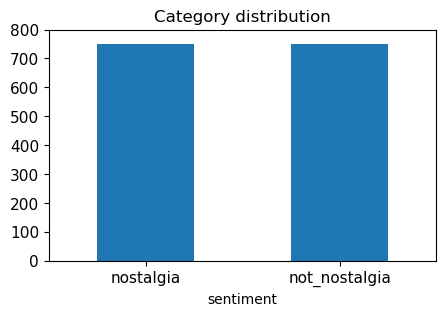

In [594]:
# print the number of member in each category of data
print(data.sentiment.value_counts())

# plot barchart for data
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

sentiment
nostalgia        381
not_nostalgia    369
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

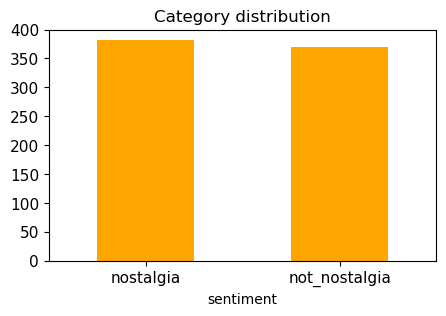

In [595]:
# print the number of member in each category of sample data
print(data_sample.sentiment.value_counts())

# plot barchart for data
data_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (5,3), color = 'orange')

### 5.2 Feature Creation

In [596]:
# import the necessary text mining library
import nltk

In [597]:
# column 'unigrams' is used to store the tokenized data of column 'comment'
# dmh.tokenize_text() using functions of nltk to split the data
data['unigrams'] = data['comment'].apply(lambda x: dmh.tokenize_text(x))

In [598]:
# check the tokenized result
data

,sentiment #,comment,sentiment,unigrams
0,0.0,He was a singer with a golden voice that I lov...,not_nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,1.0,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,1.0,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,0.0,30 day leave from 1st tour in Viet Nam to conv...,not_nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,1.0,listening to his songs reminds me of my mum wh...,nostalgia,"[listening, to, his, songs, reminds, me, of, m..."
...,...,...,...,...
1494,0.0,"i don't know!..but the opening of the video,.....",not_nostalgia,"[i, do, n't, know, !, .., but, the, opening, o..."
1495,0.0,it's sad this is such a beautiful song when yo...,not_nostalgia,"[it, 's, sad, this, is, such, a, beautiful, so..."
1496,0.0,"Dear Friend, I think age and time is not that ...",not_nostalgia,"[Dear, Friend, ,, I, think, age, and, time, is..."
1497,1.0,I was born in 1954 and started to be aware of ...,nostalgia,"[I, was, born, in, 1954, and, started, to, be,..."


In [599]:
# reorder the dataframe
order = ['unigrams', 'comment', 'sentiment #', 'sentiment']
data = data[order]
# show the first 4 tokenized results
data[:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [600]:
# take a closer look at the tokenized result
list(data[:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

This data does not contain many special symbols, so we can got a better tokenized results compared to those of the example. 

### 5.3 Feature subset selection

In [601]:
"""
usinf sklearn built in functionalities 
to learn the vocabulary and return document-term matrix.
"""
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.comment)

# check the document-term matrix of the first data in data['comment'] (first document)
print(data_counts[0])

"""
(0, 1598)	1
the first word in the first document is listed at 1598th place 
and it occurs once in the first document
"""

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


'\n(0, 1598)\t1\nthe first word in the first document is listed at 1598th place \nand it occurs once in the first document\n'

In [602]:
# first check the feature length
len(count_vect.get_feature_names_out())

3730

In [603]:
# check what the terms are in the vector by their inices
count_vect.get_feature_names_out()[3729]

'zulus'

In [604]:
# check what the terms are in the vector by their inices
count_vect.get_feature_names_out()[1000]

'dj'

In [605]:
# check what the terms are in the vector by their inices
count_vect.get_feature_names_out()[0]

'00'

In [606]:
# check what the terms are in the vector by their inices
count_vect.get_feature_names_out()[1864]

'karens'

In [607]:
# check the bult-in analyzer to remove stop words
analyze = count_vect.build_analyzer()
analyze("I am hungry.")

['am', 'hungry']

In [608]:
# check the shape of the document-term matrix
data_counts.shape

(1499, 3730)

In [609]:
# obtain the names of the terms of the vectorizer (usually on the horizontal axis)
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [610]:
# extract the first five documents and first 100 term to transform them into document-term matrix
data_counts[0:5, 0:100].toarray() # convert from sparse array to normal array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [611]:
# check what the term are in the vector by their inices
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [612]:
# plot the first twenty features
"""
the X-axis: the name of the feature 
the Y-axis: which document
"""
# plot the x-axis
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

#plot the y-axis
index = list(data.index) # obtain document index
plot_y = ["doc_"+ str(i) for i in index[:20]]

# plot the content of the chart
plot_z = data_counts[0:20, 0:20].toarray() # data_counts[how many documents, how many terms]

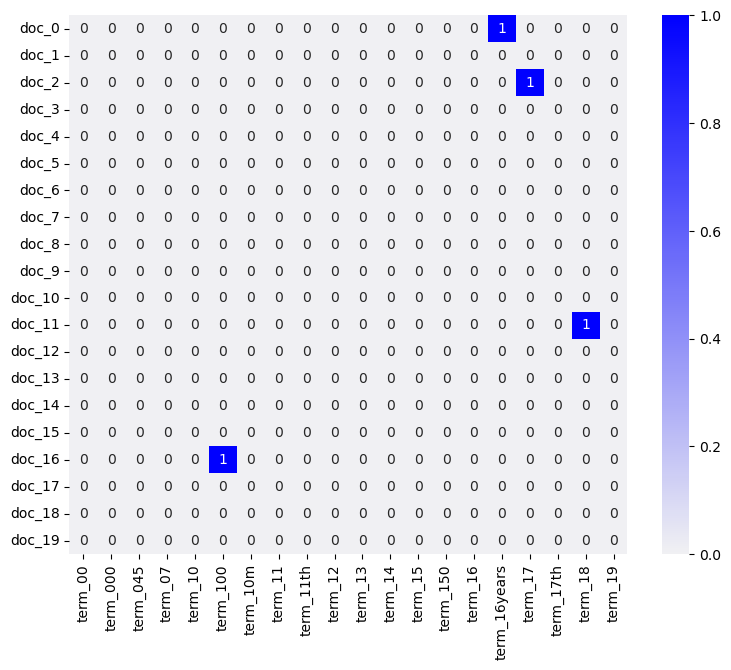

In [613]:
# use the visualization library seaborn to draw a heat map
# import seaborn
import seaborn as sns

# construct a new data frame to record the data we would like to focus on
df_heat = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# construct the plot
plt.subplots(figsize=(9, 7))
plot = sns.heatmap(df_heat,
                 cmap=sns.color_palette("light:b", as_cmap=True),
                 vmin=0, vmax=1, annot=True)

### 5.4 Attribute Transformation / Aggregation

In [614]:
# Aggregation: calculate the frequency of each term in each document

term_freq = []

# traverse all the documents in data_counts
for j in range(0,data_counts.shape[1]):
    term_freq.append(sum(data_counts[:,j].toarray()))

In [615]:
# sum up the frequency of the same term in each document
term_freq = np.asarray(data_counts.sum(axis=0))[0]

In [616]:
term_freq[0] #sum of first term: 00

1

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3848333238.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



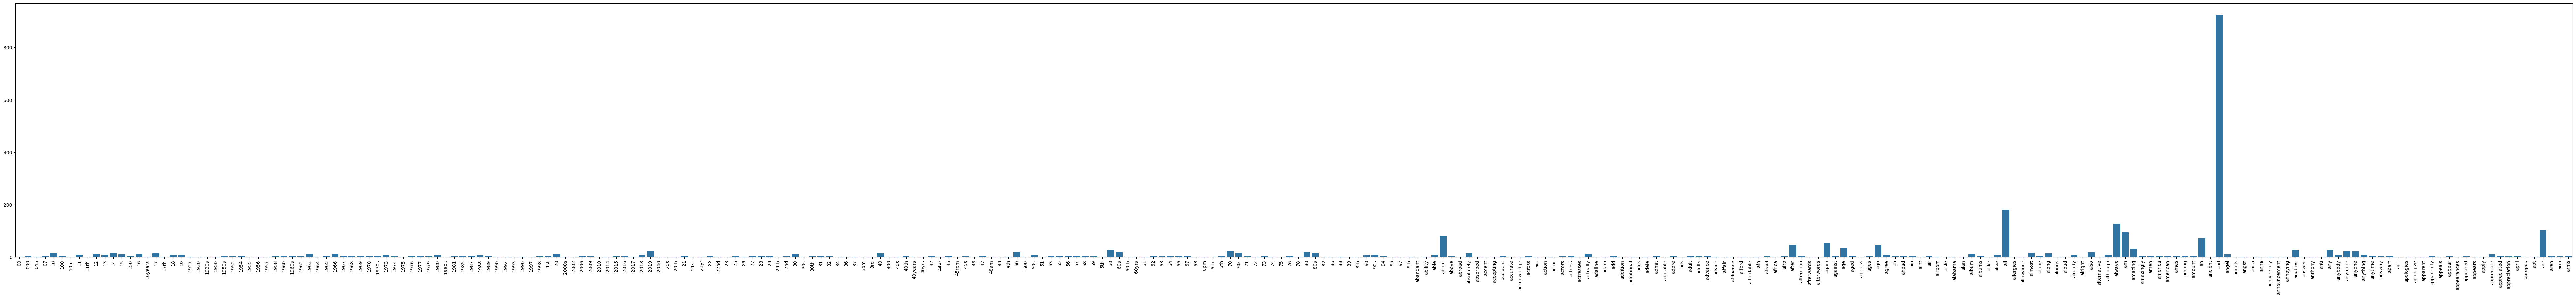

In [617]:
# plot the frequency of first 300 terms using bar chart
plt.subplots(figsize=(100, 10))
plot2 = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
                    y=term_freq[:300])
plot2.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [618]:
"""
Attribute Transformation:
=> transform the values in that vector into the log distribution
=> visualize the distribution in a more readable format
"""
# import math library
import math
term_freq_log = [math.log(i) for i in term_freq]

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/2052919405.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/2052919405.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



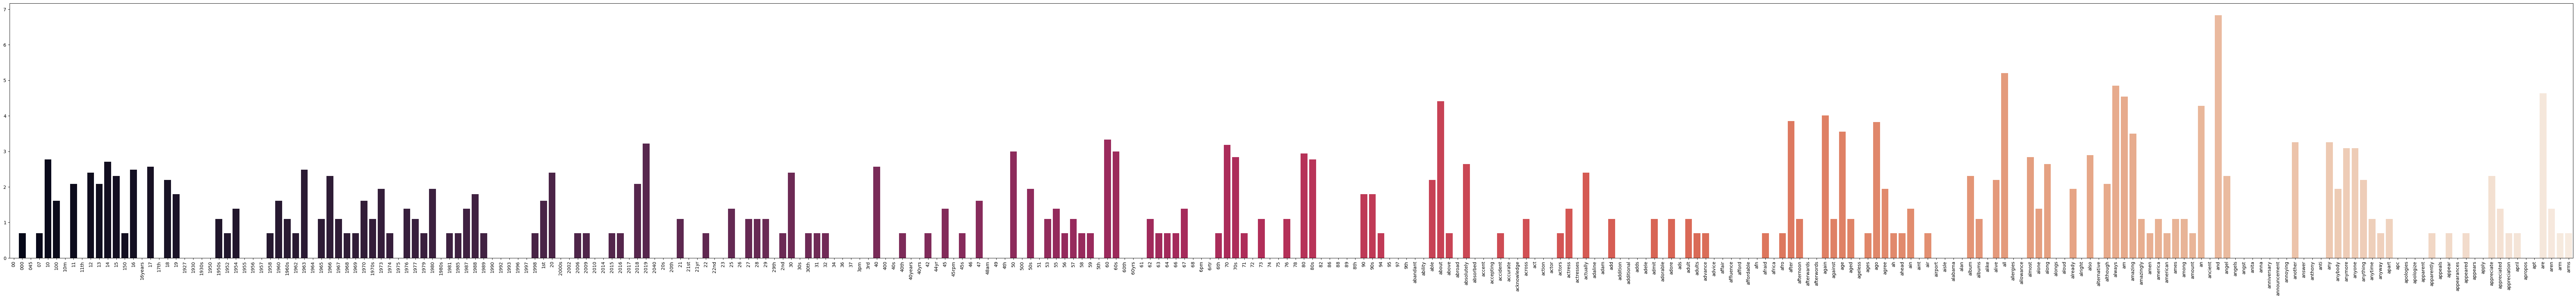

In [619]:
# plot the log distribution plot 
plt.subplots(figsize=(100, 10))
# sns.color_palette("cubehelix", as_cmap=True)
plot2_ = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                     y=term_freq_log[:300],
                     palette='rocket')
plot2_.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Finding frequent patterns

In [620]:
# import the necessary library
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = data['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = data[data['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique term (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are terms
    term_document_df = pd.DataFrame(counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [621]:
# Display the filtered DataFrame for one of the categories (0 or 1)
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Through the presented column and row numbers, we can know that the data is correctly transformed as we desired, and we can start to plot the content of the new dataframe.

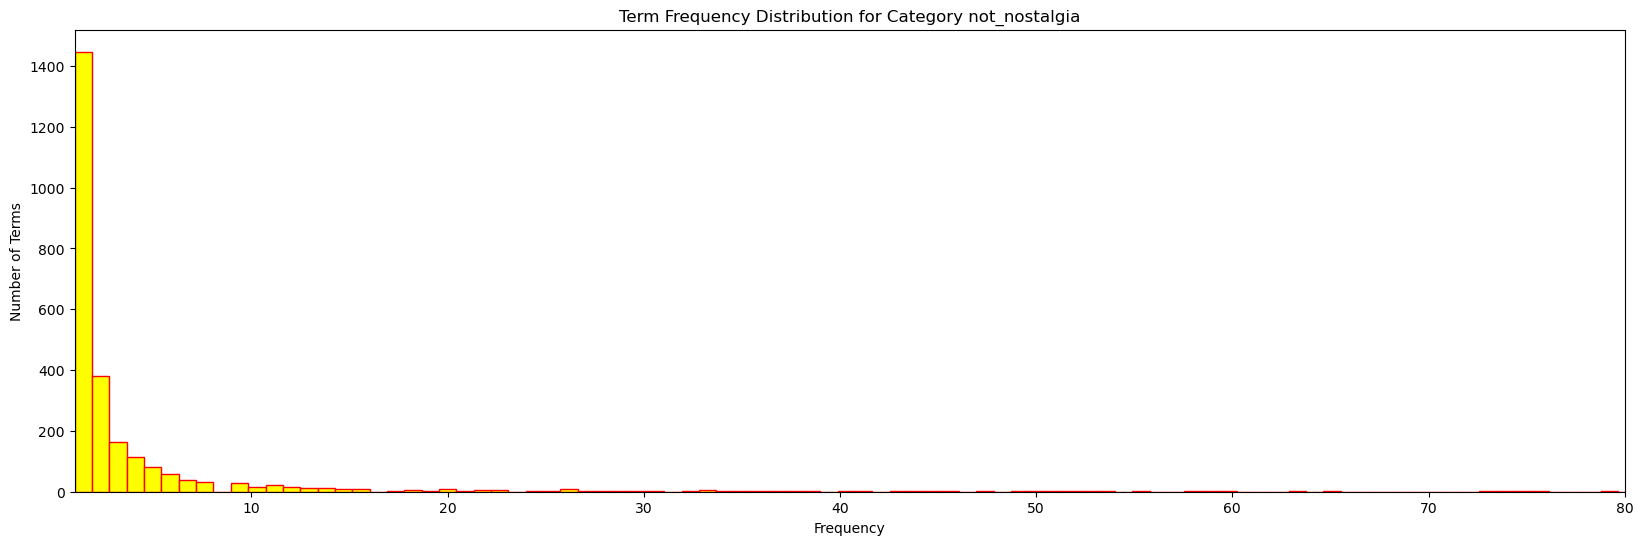

In [622]:
# Sum over all documents to get total frequency for each word
category_number=0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(20, 6))
plt.hist(word_counts, bins=800, color='yellow', edgecolor='red')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 80)
plt.show()

From this graph, we can see that a small number of words appear often while most of the words appear very infrequently across the entire dataset.

In [623]:
"""
To improve the results, we can filter out some terms.
Specifically, we'll filter:
    1. the top 5% of the most frequent ones (avoid like stopwords).
    2. the bottom 1% of the least frequent words 
This helps us focus on words that might reveal more valuable patterns.
"""
# filter 1. the top 5% of the most frequent ones (avoid like stopwords).
category_number=1 # 0 or 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies (frequency from big to small)
sorted_counts = word_counts[sorted_indices] # Sort frequencies in descending order (from big to small)
#(or sorted_counts = np.sort(word_counts)[::-1])

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

# show the top 5% frequent terms
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing', 'little', 'takes']


In [624]:
# check the frequencies sorted in a descending order
sorted_counts

array([643, 566, 545, ...,   1,   1,   1])

In [625]:
# check the indices corresponding to the terms after being sorted by frequency in a descending order
sorted_indices

array([2011, 1403, 2026, ..., 1713,  908, 2294])

In [626]:
# sum up the column corresponding to the top 5% words, and just specify the first one.
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)

643

In [627]:
# filter 2. the bottom 1% of the least frequent words
category_number=0 # 0 or 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies (from small to big)
sorted_counts = word_counts[sorted_indices]  # Sort frequencies (from small to big)
#(or sorted_counts = np.sort(word_counts))

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

# show the bottom 1% frequent terms
print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not_nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [628]:
# check the frequencies sorted in an ascending order
sorted_counts

array([  1,   1,   1, ..., 451, 452, 708])

In [629]:
# check the indices corresponding to the terms after being sorted in an ascending order
sorted_indices

array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [630]:
# sum up the column corresponding to the bottom 1% terms, and just specify the first one.
filt_term_document_dfs[categories[category_number]].loc[:,'00'].sum(axis=0)

1

Filter out the above data (top 5% and bottom 1%) from the dataframe

In [631]:
category_number=1 # 0 or 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # print which words correspond to the bottom percentage we filter
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    
    # print which words correspond to the top percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not_nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### frequent pattern mining process
- Using PAMI and transform the dataframe into transcational data form
- generate a CSV file for each category to create this database

A key step in this process is defining the threshold that determines when a value in the data is considered a transaction. As we observed in the previous cell, there are many zeros in our dataframe, which indicate that certain words do not appear in specific documents. With this in mind, we'll set the transactional threshold to be greater than or equal to 1. This means that for each document/transaction, we will include all the words that occur at least once (after filtering), ensuring that only relevant words are included in the pattern mining process.

In [632]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


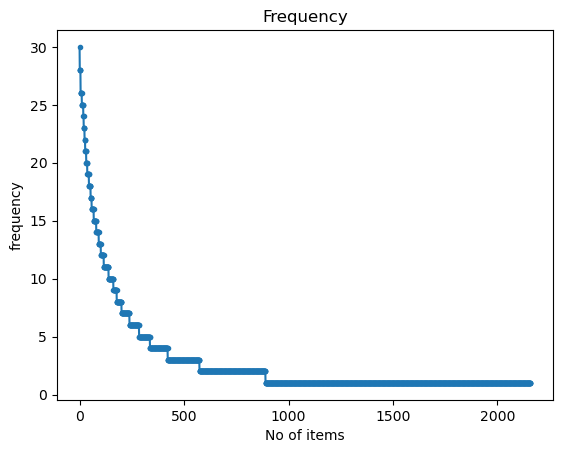

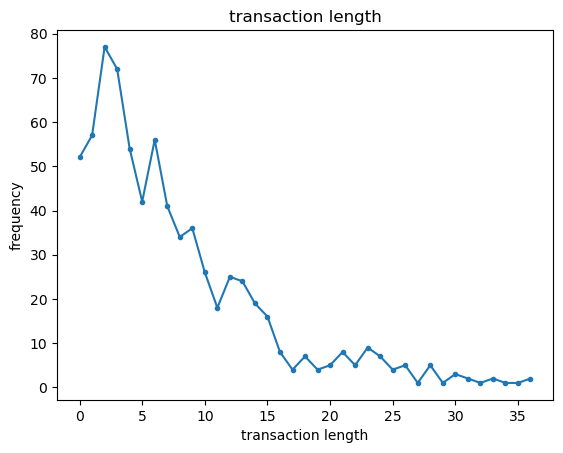

In [633]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


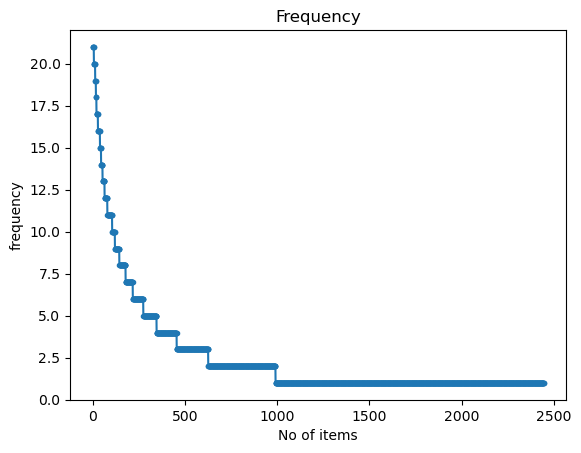

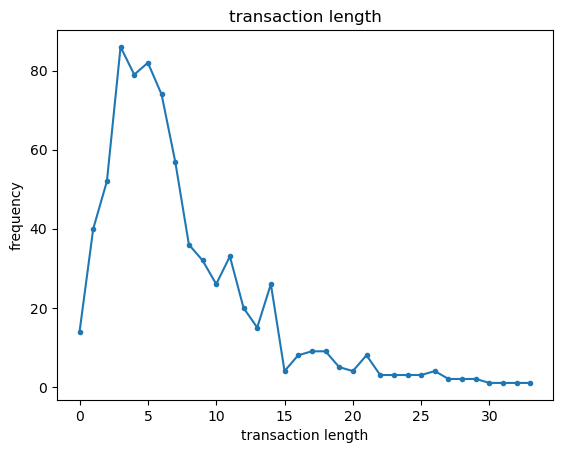

In [634]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

About the showing details:
- the total number of transactions: the amount of documents per category
- the number of items: the amount of unique words encountered in each category
- the transaction size: the amount of words per document that it can be found

From the above results, we can know that the two categories are very sparse, which is the result of having many zeros in the first place when making the document-term matrix.

We are going to use the FPGrowth algorithm from PAMI, and for that we need to determine the minimum support (frequency) that our algorithm will use to mine for patterns in our transactions.

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture "important patterns" that show real connections in the data, but we also want to avoid too many unimportant patterns. 
For this dataset, I chosen a minSup of **7** as the observations as follows:
- **Item Frequency**: The first graph shows that most items don't appear very often in transactions. There's a sharp drop in how frequently items appear, which means our data has many items that aren't used much. (as the Lab1-Mater example)

- **Transaction Length**: The second graph shows that most transactions involve a small number of items.The most common transaction sizes are small, which matches our finding that the dataset does not group many items together often. (as the Lab1-Mater example)
  
By setting minSup at **7**, we focus on combinations of items that show up in these smaller, more common transactions.
- This level is low enough to include items that show up more than just a few times, but it's high enough to leave out patterns that don't appear often enough to be meaningful.
- This helps us keep our results clear and makes sure the patterns we find are useful and represent what's really happening in the dataset.

In [635]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=7
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()

# print the total number of patterns
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia)))

# measure the runtime
print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 249
Runtime: 0.006514310836791992


In [636]:
#save the patterns
obj1.save('freq_patterns_nostalgia_minSup7.txt') 
frequentPatternsDF_nostalgia

,Patterns,Support
0,things,7
1,1966,7
2,both,7
3,girlfriend,7
4,remembering,7
...,...,...
244,ever,28
245,would,28
246,will,28
247,go,28


In [637]:
# utilize the FPGrowth for every category
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=7
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()

# print the total number of patterns
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia)))
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 217
Runtime: 0.0054438114166259766


In [638]:
#save the patterns
obj1.save('freq_patterns_not_nostalgia_minSup7.txt') 
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,golden,7
1,loving,7
2,top,7
3,least,7
4,maybe,7
...,...,...
212,every,21
213,loved,21
214,classic,21
215,them,21


Now that we've extracted **the transactional patterns** from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to **identify and use only the unique patterns that are specific to each category**. This involves filtering out any patterns that are common across multiple categories.

The reason for focusing on unique patterns is that they can **significantly improve the classification process**. When a document contains these distinctive patterns, it **provides clear, category-specific signals** that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

In [639]:
import pandas as pd

# group together all of the dataframes related to the found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes

pattern_counts = {}

for df in dfs:
    for pattern in df['Patterns']:
        
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# "Filter out" patterns that appear in "more than one" dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)

# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result

print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
158        will       28
157       would       28
156        ever       28
155        wish       26
154          or       26
..          ...      ...
164  appreciate        7
163         off        7
162       maybe        7
161       least        7
0          1966        7

[286 rows x 2 columns]
Number of patterns discarded: 180


From the result shown above, we can observe that a significant number of patterns that were common across the two categories, which is reasons for discarding them.

The next step is to integrate these **category-specific patterns** into original data by converting the patterns into binary data within the columns of our document-term matrix. Specifically, check each document for the presence of each pattern:
- If a pattern is found in the document, mark it with a '1';
- If it's not present, mark it with a '0'.

This binary encoding allows us to effectively augment our data, enhancing its utility for subsequent classification tasks.

In [640]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
data_tdm = count_vect.fit_transform(data['comment'])  # data['comment'] contains the text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(data_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3523092934.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,00,000,045,07,10,100,10m,11,11th,12,...,miss,told,must,probably,background,appreciate,off,maybe,least,1966
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.5 Dimensionality Reduction
linear dimensionality reduction:
- Principal Component Analysis (PCA)
non-linear dimensionality reductions:
- t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Uniform Manifold Approximation and Projection (UMAP)

In [641]:
# Applying dimensionality reduction with the document-term frequency data
# import necessary libraries and modules
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
"""
 Apply PCA, t-SNE, and UMAP to the data:
 - Reduce the dimension to two
 - transform the data
"""
data_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
data_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
data_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [642]:
# check the resulting shape of each plot
data_pca_tdm.shape

(1499, 2)

In [643]:
# check the resulting shape of each plot
data_tsne_tdm.shape

(1499, 2)

In [644]:
# check the resulting shape of each plot
data_umap_tdm.shape

(1499, 2)

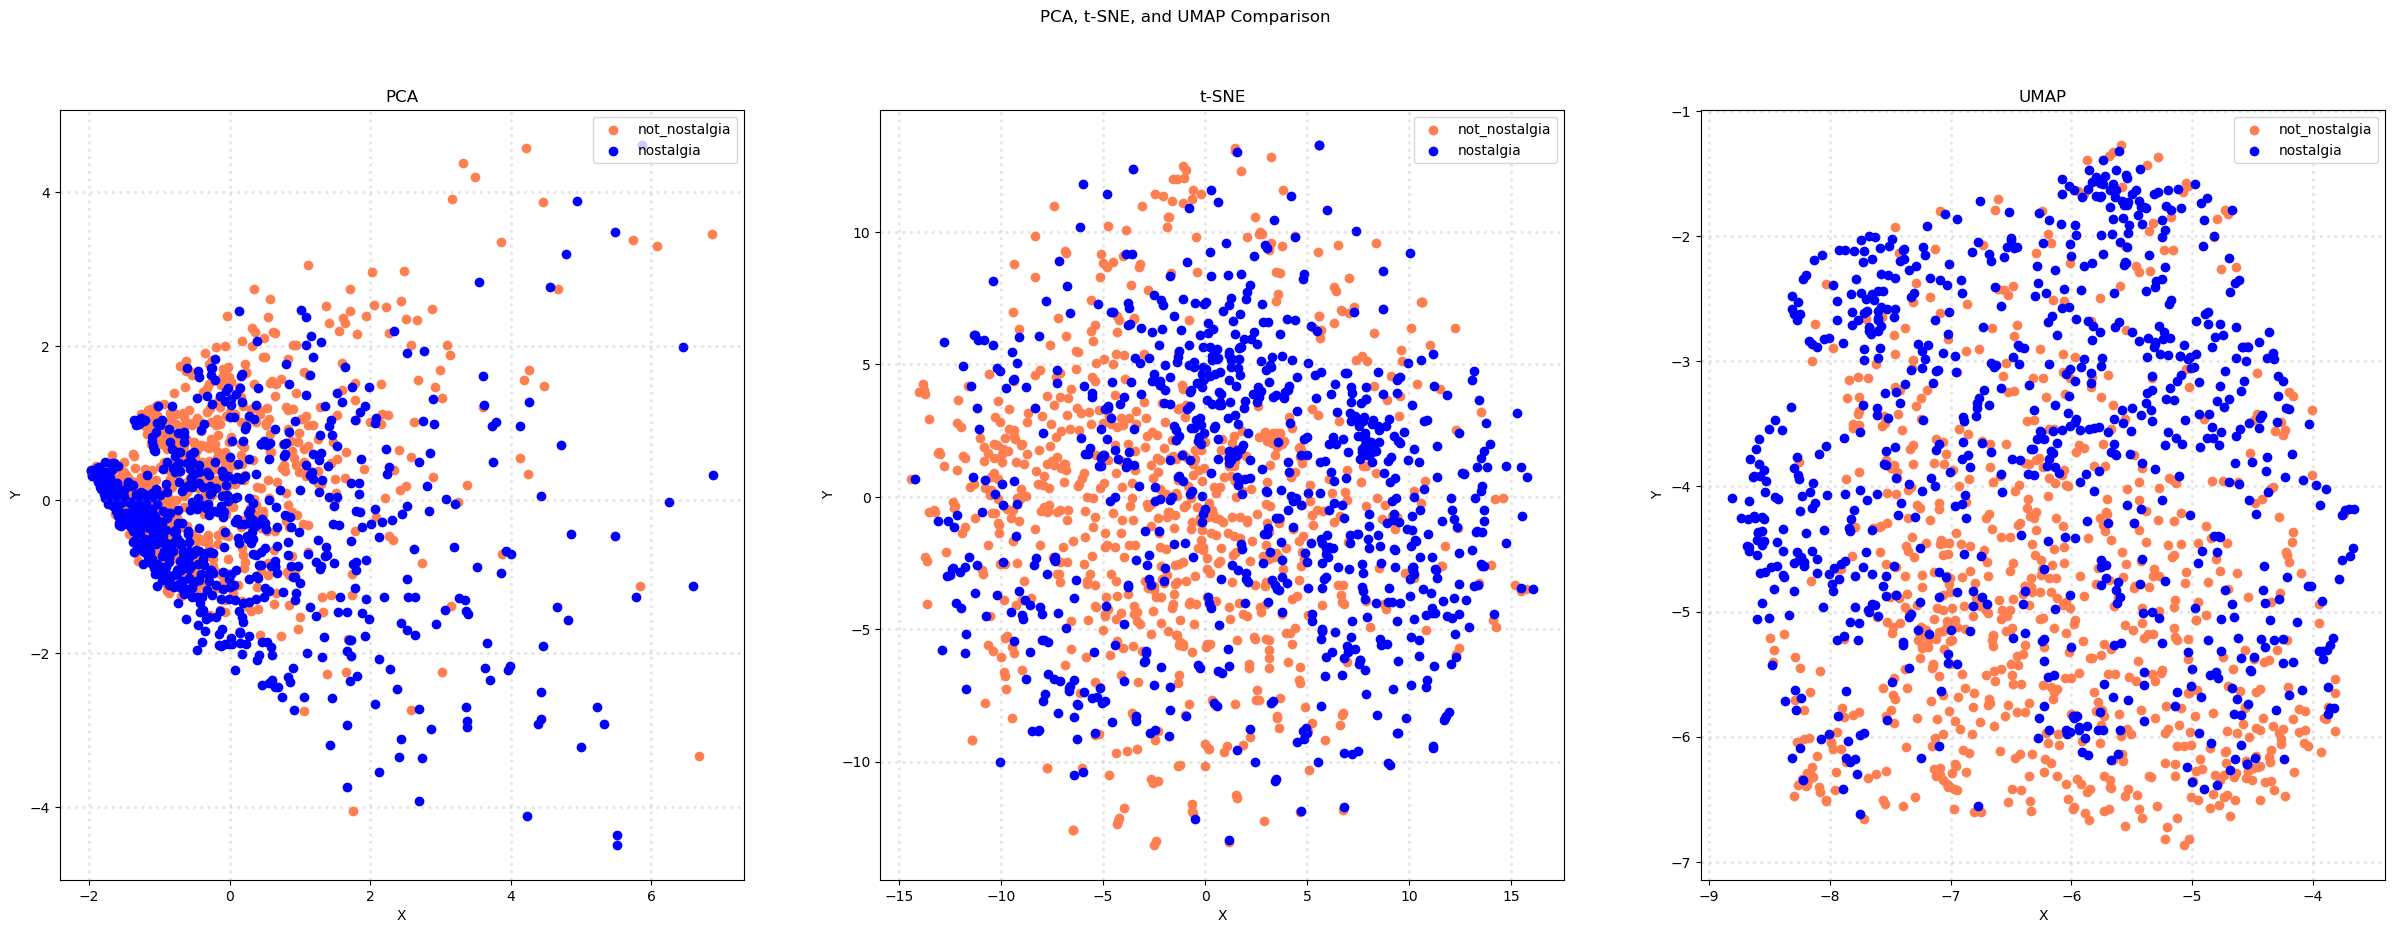

In [645]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['sentiment'] == category].T[0]
        ys = X_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], data_pca_tdm, 'PCA')
plot_scatter(axes[1], data_tsne_tdm, 't-SNE')
plot_scatter(axes[2], data_umap_tdm, 'UMAP')

plt.show()

For the plots showing above:
- In the 2D PCA visualization above, the grouping pattern is not clear.
- In the t-SNE graph, we observe a more scattered distribution, but still intermixing with all the categories. The group 'not nostalgia' seems to surround the group "nostalgia", but we can observe that the points of the two groups in the middle of the plot are intertwined with one another.
- In the UMAP graph, as in the t-SNE graph, the two groups remain intermixed. Contrast with t-SNE graph, the group 'nostalgia' seems to surround the group "not nostalgia", but we can also observe that the points in the middle of the two groups are intertwined with one another.

The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach.

Now try in tandem with our pattern augmented data:

In [646]:
"""
Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
Apply PCA, t-SNE, and UMAP to the data

"""
data_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
data_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
data_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

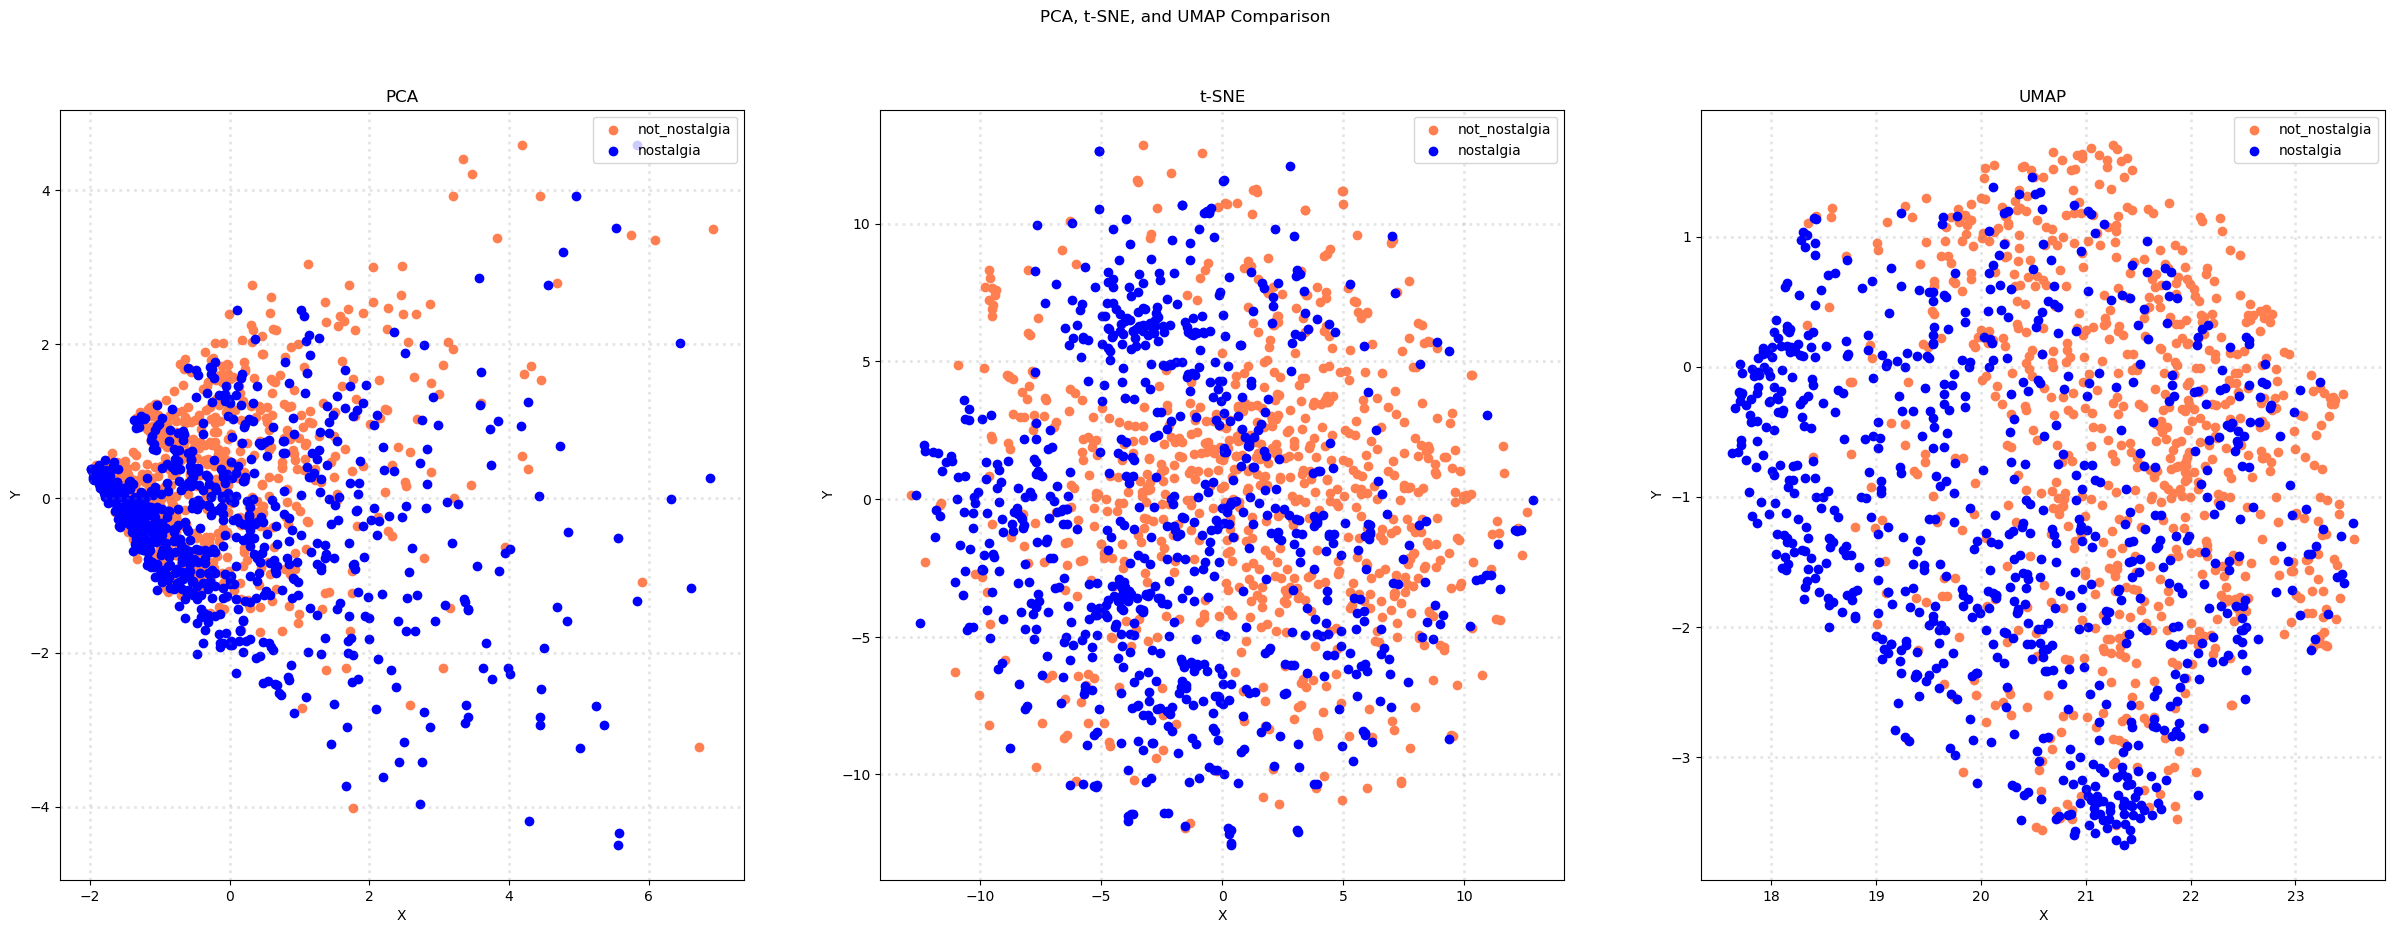

In [647]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['sentiment'] == category].T[0]
        ys = X_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], data_pca_aug, 'PCA')
plot_scatter(axes[1], data_tsne_aug, 't-SNE')
plot_scatter(axes[2], data_umap_aug, 'UMAP')

plt.show()

Observing the three plots:
1. the PCA graph
The visualization hasn't changed much from the previous version. (This is likely because the original document-term matrix still dominates what the algorithm captures, overshadowing the new binary pattern data we added.)

2. the t-SNE graph
It's almost the same with only slight changes in how the data points are placed. (This similarity might be due to the stability of the t-SNE algorithm. Even small changes in the data can result in embeddings that look different but are structurally similar, indicating that the binary patterns may not have significantly altered the relationships among the data points in high-dimensional space.)

3. the UMAP graph
The visualization shows the points of the two groups still scatter around, but the two UMAP graphs seems to be symmetrical with x-axis. And the categories still appear quite mixed together.

These techniques are mainly used to help us see and understand complex data in a simpler two or three-dimensional space. However, they have their limits and might not show everything a computer model can find in the data. We should use more methods and analyses to get the full picture!

### 5.6 Discretization and Binarization

We are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, sentiment, into two binary attributes (similar to the idea of adding column "sentiment #" in the very beginning.) People from the machine learning community also refer to this transformation as one-hot encoding.

In [648]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [649]:
mlb = preprocessing.LabelBinarizer()

In [650]:
mlb.fit(data.sentiment)

LabelBinarizer()

In [651]:
# add a new column 'bin_sentiment' to store the transform results
data['bin_sentiment'] = mlb.transform(data['sentiment']).tolist()

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3156371079.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [652]:
# check the first 9 data
data[0:9]

,unigrams,comment,sentiment #,sentiment,tokenized_text,bin_sentiment
0,"[He, was, a, singer, with, a, golden, voice, t...",He was a singer with a golden voice that I lov...,0.0,not_nostalgia,"{age, still, fan, singer, vouch, I, now., gold...",[1]
1,"[The, mist, beautiful, voice, ever, I, listene...",The mist beautiful voice ever I listened to hi...,1.0,nostalgia,"{when, still, The, I, beautiful, listened, and...",[0]
2,"[I, have, most, of, Mr., Reeves, songs, ., Alw...",I have most of Mr. Reeves songs. Always love ...,1.0,nostalgia,"{age, like, loving, around., it, I, how, leave...",[0]
3,"[30, day, leave, from, 1st, tour, in, Viet, Na...",30 day leave from 1st tour in Viet Nam to conv...,0.0,not_nostalgia,"{hope, when, I, leave, greatest, came, have, b...",[1]
4,"[listening, to, his, songs, reminds, me, of, m...",listening to his songs reminds me of my mum wh...,1.0,nostalgia,"{my, listening, everyday, played, to, songs, m...",[0]
5,"[Every, time, I, heard, this, song, as, a, chi...","Every time I heard this song as a child, I use...",1.0,nostalgia,"{still, Now, your, it, I, funerals., child,, a...",[0]
6,"[My, dad, loved, listening, to, Jim, Reeves, ,...","My dad loved listening to Jim Reeves, when I w...",1.0,nostalgia,"{when, it, I, how, back, 70's, changes, My, di...",[0]
7,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...",i HAVE ALSO LISTENED TO Jim Reeves since child...,1.0,nostalgia,"{I, nostalgic, am, puts, since, now, Reeves, a...",[0]
8,"[Wherever, you, are, you, always, in, my, heart]",Wherever you are you always in my heart,0.0,not_nostalgia,"{my, you, are, heart, in, always, Wherever}",[1]


Since we only have two categories, we can see that the column 'bin_sentiment' only show 0 or 1, which represents 'not_nostalgia' and 'nostalgia' respectively.

### 6. Data Exploration
Sometimes we need to take a peek at our data to understand the relationships in our dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [653]:
# retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [654]:
# print the comment results
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [655]:
from sklearn.preprocessing import binarize

# transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [656]:
# calculate Cosine Similarity
# import the necessary library
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3974700899.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3974700899.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3974700899.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3974700899.py:18:

From the results showing above:
- As expected, cosine similarity between a sentence and itself is 1, while between 2 entirely different sentences, it will be 0.
- We can assume that we have the more common features in the documents 1 and 2 than in documents 1 and 3. This reflects indeed in a higher similarity than that of sentences 1 and 3.

### 7. Data Classification

Data classification is one of the most critical steps in the final stages of the data mining process. After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. This step is crucial in making the mined data actionable, as it allows for accurate predictions and decision-making. For example, in text mining, classification can be used to categorize documents based on their content, like classifying news articles into categories such as sports, politics, or technology. Among various classification techniques, the Naive Bayes classifier is a simple yet powerful algorithm commonly used for text classification tasks. Specifically, the Multinomial Naive Bayes classifier is particularly suited for datasets where features are represented by term frequencies, such as a document-term matrix, like the one we have.

Now, when incorporating the binary matrix of patterns we have, it remains compatible because the binary values can be seen as a count of pattern occurrences (1 for present, 0 for absent). Although binary features are not true "counts," the Multinomial Naive Bayes classifier can still handle them without issue.

We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical 70/30 split for the training and test set. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [657]:
# Model with only the document-term frequency data
# import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
data['sentiment #'] = data['sentiment #'].astype(int)
category_mapping = dict(data[['sentiment #', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
"""
    data_train: feature matrix for training set
    data_test: feature matrix for testing set
    y_train: target label for training set
    y_test: target label for testing set
"""
data_train, data_test, y_train, y_test = train_test_split(tdm_df, data['sentiment'], test_size=0.3, random_state=42)

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/2936593484.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [658]:
# show the train data
data_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [659]:
# show the test data
data_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [660]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(data_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

not_nostalgia     0.8162    0.9569    0.8810       232
    nostalgia     0.9438    0.7706    0.8485       218

     accuracy                         0.8667       450
    macro avg     0.8800    0.8638    0.8647       450
 weighted avg     0.8780    0.8667    0.8652       450



Recap the first model, the document-term matrix data already allows the model to classify it with great accuracy, but if we add the additional information provided by the patterns then we see a slightly better result to an already high score. 

From the above results, we can conclude that the combination of binary matrix of patterns with document-term matrix (word frequencies).

While the document-term matrix captures individual word frequencies, the pattern matrix adds valuable information about co-occurrences and higher-level word combinations, providing complementary insights. This enhanced feature set allows the classifier to better differentiate between categories, particularly in cases where word frequencies alone might not be enough.

# Third:
1. new data visualizations
2. TF-IDF features
3. Naive Bayes classifier

### Answer here

1. new data visualizations

(1)-1 Using plotly to plot the term-frequency document

In [661]:
!pip install plotly

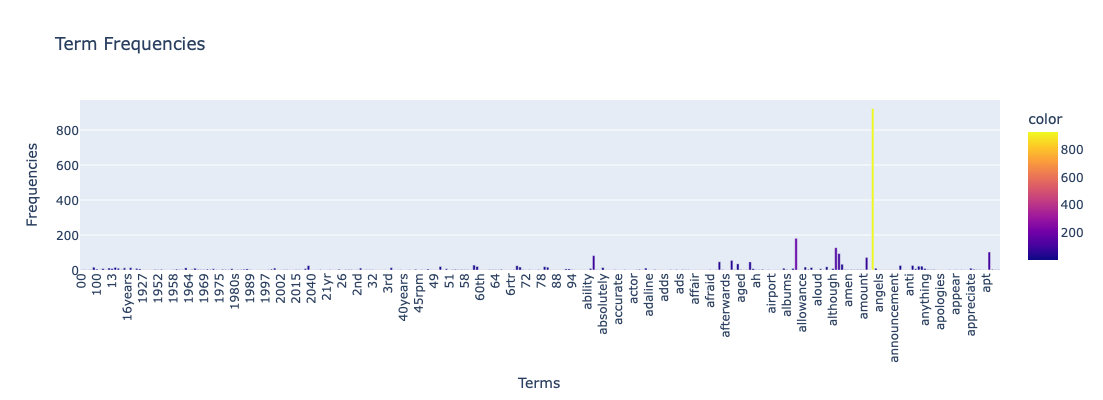

In [662]:
import plotly.express as px
import numpy as np

# Calculate the term frequency
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

# Capture the first 300 terms and their corresponding frequencies (as example)
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Plot the figure with 'plotly'
fig = px.bar(x=terms, y=frequencies,
             title='Term Frequencies',
             labels={'x':'Terms', 'y':'Frequencies'},
             color=frequencies, 
             color_continuous_scale='Plasma')

# Arrange the x-axis
fig.update_layout(xaxis_tickangle=-90, width=1100, height=400)

# Show the plot
fig.show()

(1)-2 Using plotly to plot top terms frequency document

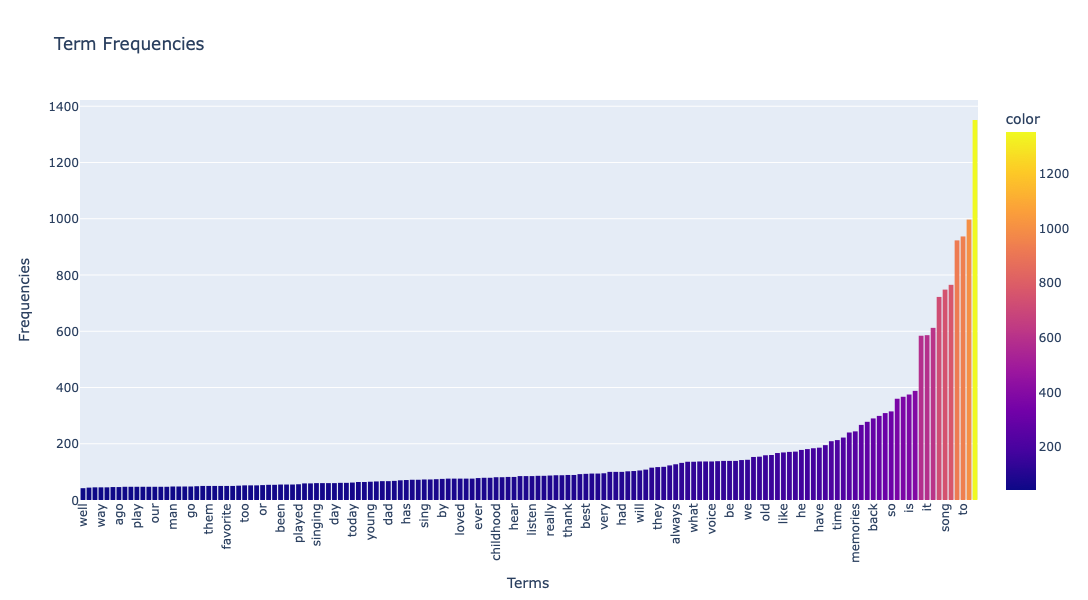

In [663]:
import plotly.express as px
import numpy as np

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# Extract the top 150 frequency terms
idx = np.argsort(term_frequencies)[-150:]
top_terms = terms[idx]
top_freq = term_frequencies[idx]

# Plot the figure with 'plotly'
plot = px.bar(x=top_terms, y=top_freq, labels={'x':'Terms', 'y':'Frequencies'},
             title=f'Term Frequencies',
             color=top_freq,  
             color_continuous_scale='Plasma')

# Arrange the x-axis
plot.update_layout(xaxis_tickangle=-90, width=1000, height=600)

# Modify the distances between bars and the width of the bar
plot.update_traces(marker_line_width=0, width=0.8)

# Show the plot
plot.show()

Example of the result:
![term freq](term_freq4.png)

2. Using 3D-plot to plot the results of augmented data (document-term frequency data + pattern derived data derived from the last part) under the process of PCA, t-SNE, and UMAP 

In [664]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

data_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
data_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
data_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

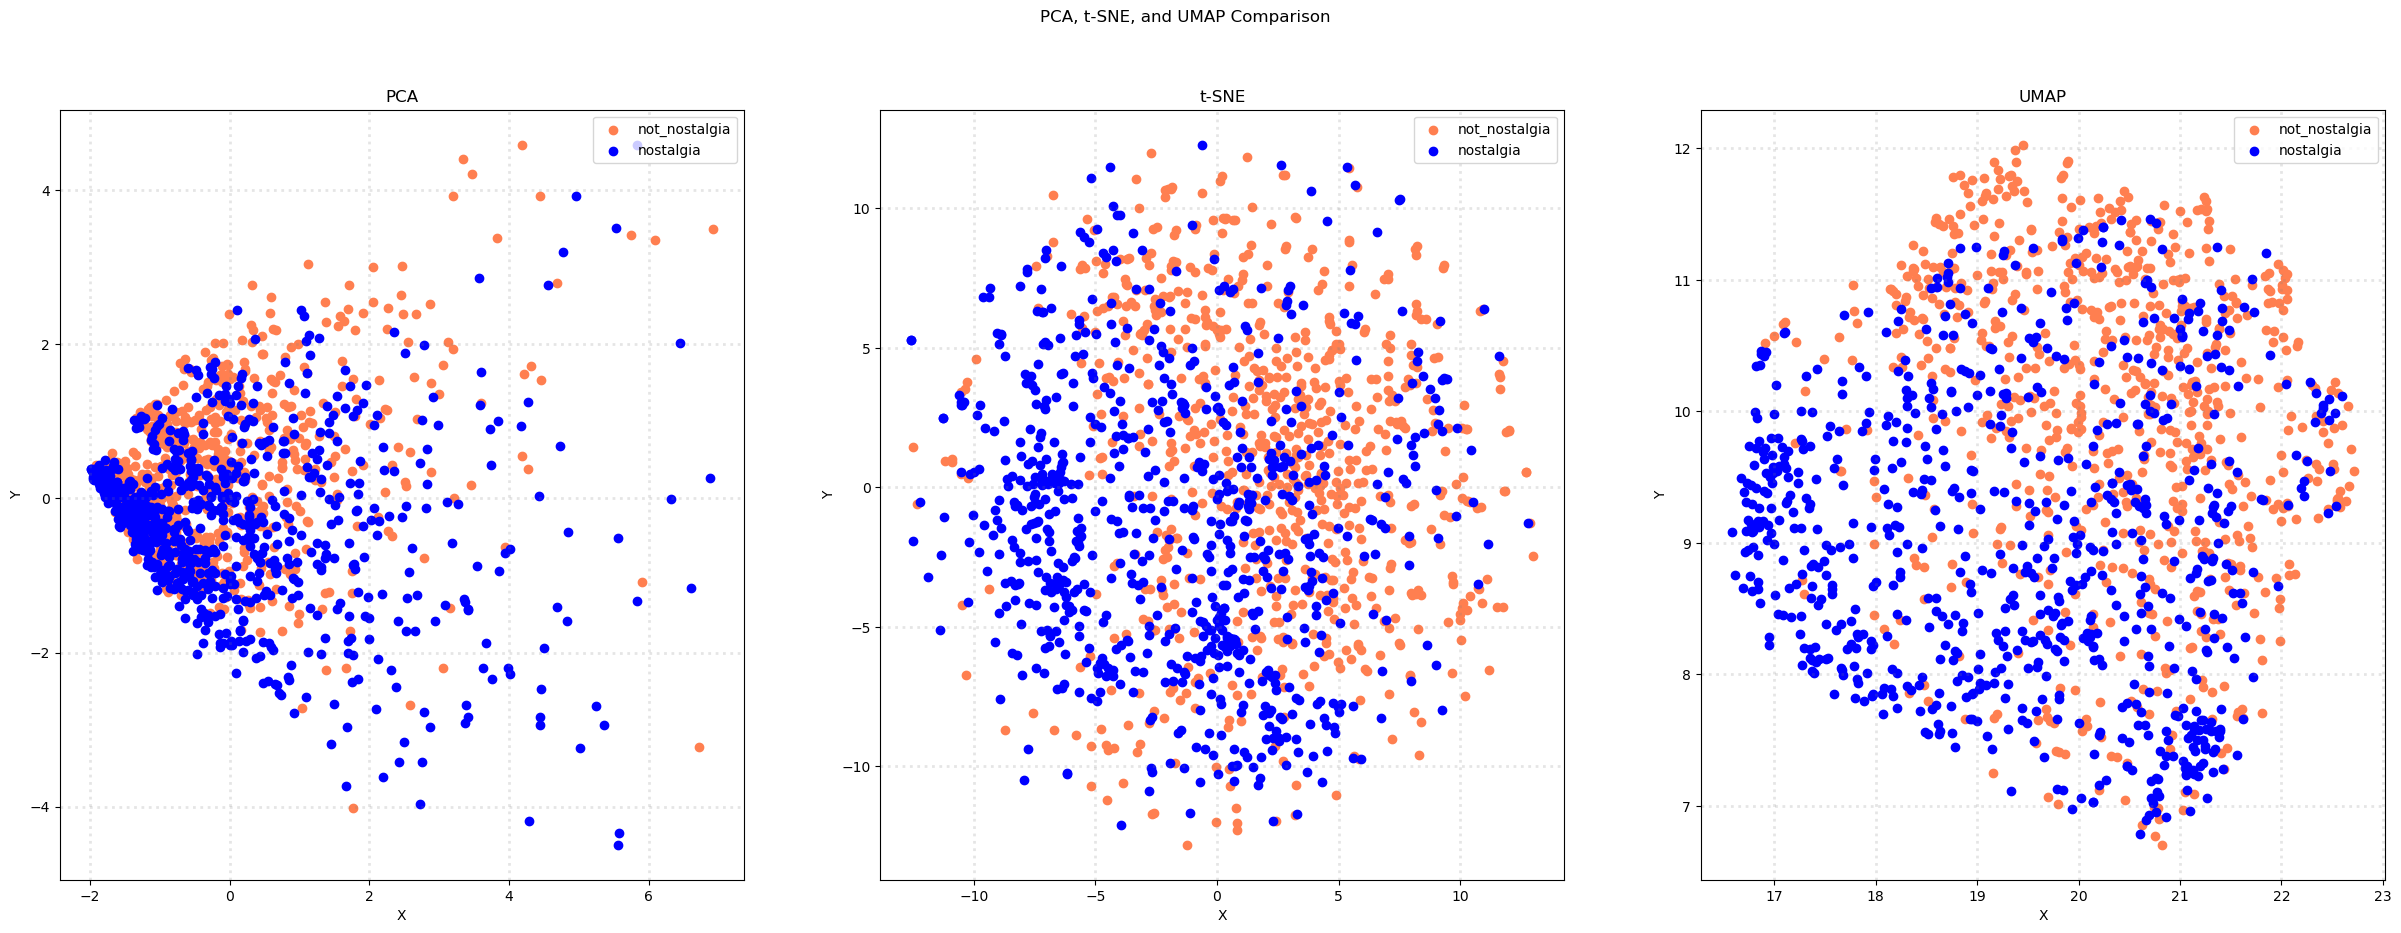

In [665]:
# Original 2D plot
col = ['coral', 'blue']
categories = data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['sentiment'] == category].T[0]
        ys = X_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], data_pca_aug, 'PCA')
plot_scatter(axes[1], data_tsne_aug, 't-SNE')
plot_scatter(axes[2], data_umap_aug, 'UMAP')

plt.show()

In [666]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
data_tdm = count_vect.fit_transform(data['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(data_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/3581691366.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



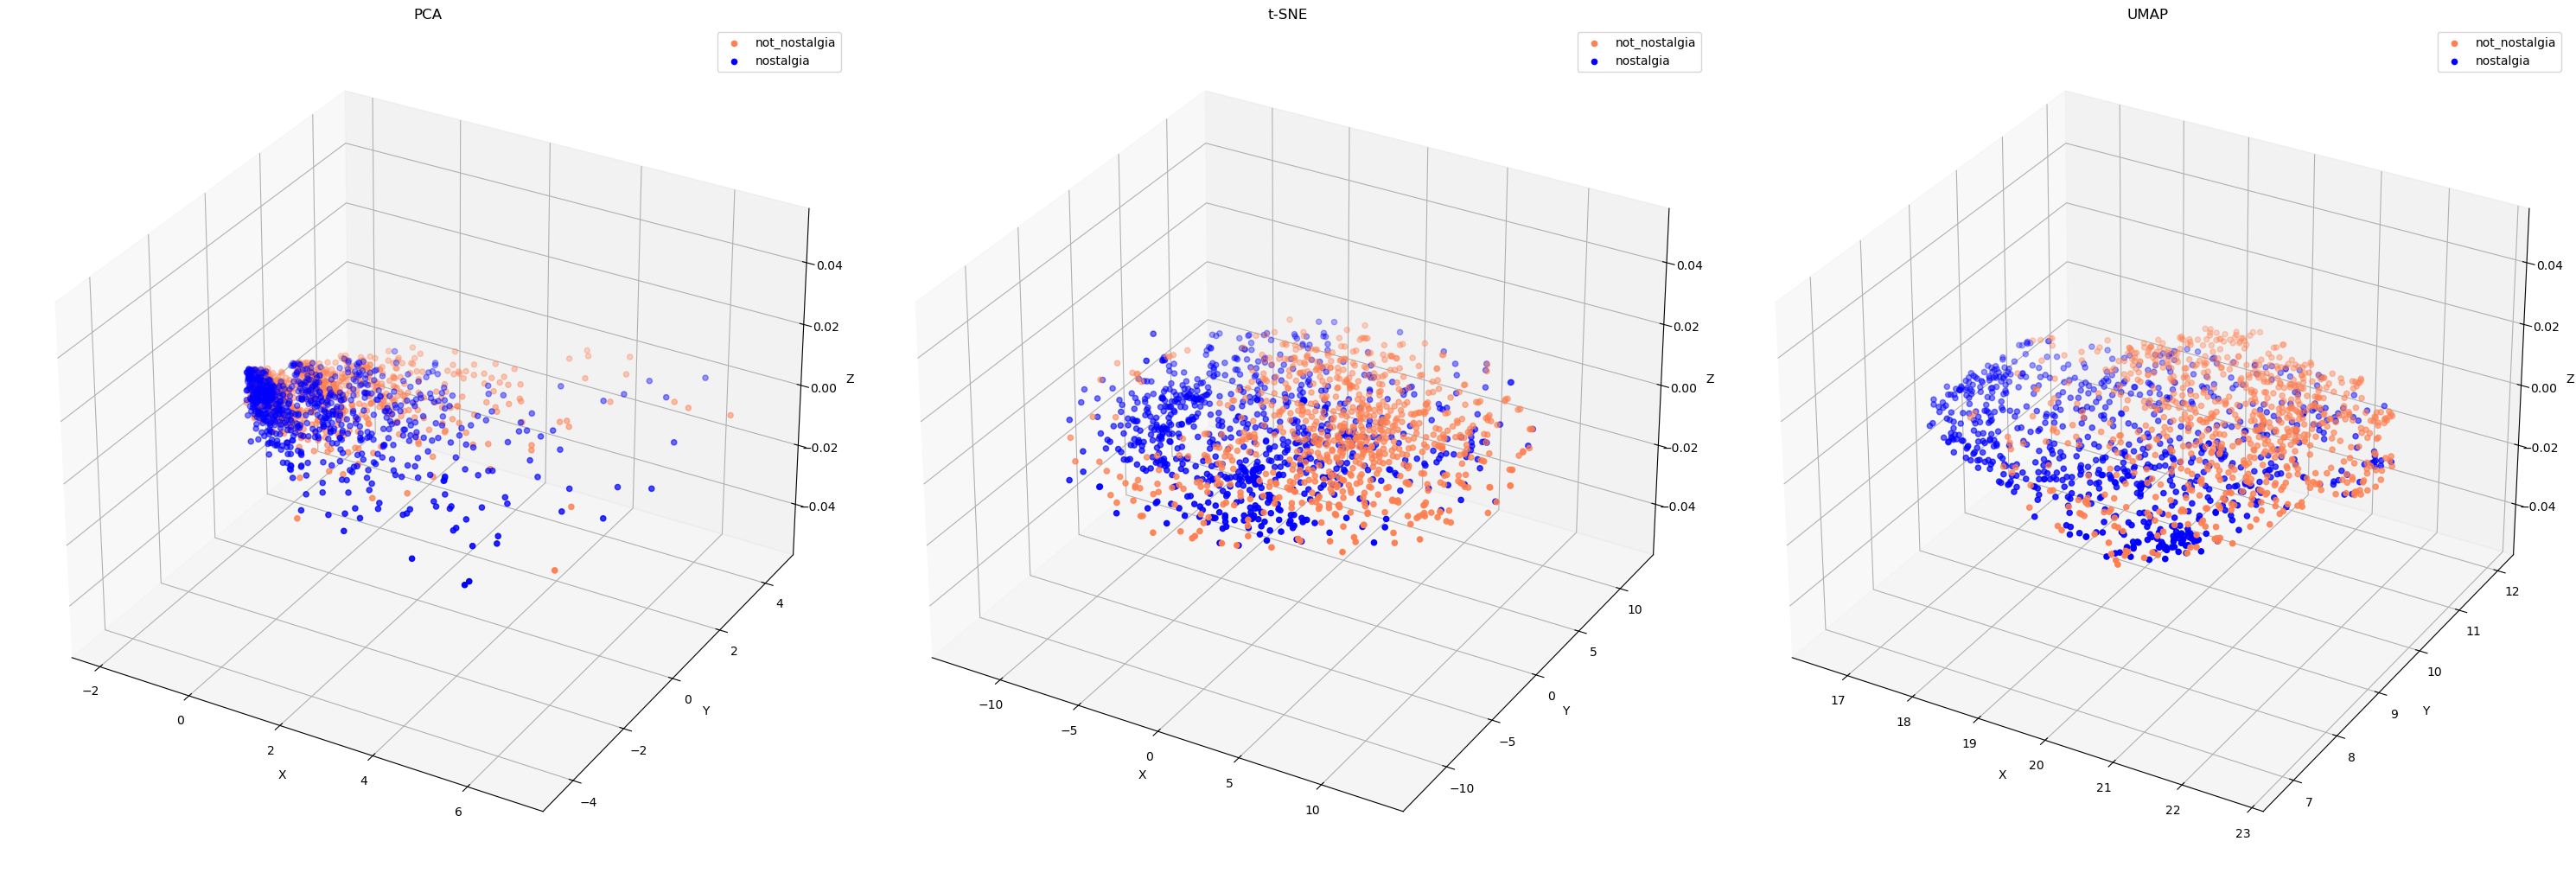

In [667]:
# import necessary libraries and modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(30, 10))

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title):
  for c, category in zip(col, categories):
    xs = X_reduced[data['sentiment'] == category].T[0]
    ys = X_reduced[data['sentiment'] == category].T[1]
    ax.scatter(xs, ys, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.legend(loc='upper right')

# Create 3D subplots and plot using the function
ax_pca = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax_pca, data_pca_aug, 'PCA')

ax_tsne = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax_tsne, data_tsne_aug, 't-SNE')

ax_umap = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax_umap, data_umap_aug, 'UMAP')

plt.tight_layout()
plt.show()

---------------------------------------------------------  Split Line ---------------------------------------------------------------------

2. TF-IDF features

In [670]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Convert the tokenized text into string
data＿ = data
data_['tokenized_text'] = data['tokenized_text'].apply(list)
data_['tokenized_text'] = data_['tokenized_text'].apply(lambda x: ','.join(x))

# Do the TF-IDF transormation
X = vectorizer.fit_transform(data_['tokenized_text'])
# Show the transormed results
print(X)

  (0, 1272)	0.15912890139131805
  (0, 2018)	0.21679199749738698
  (0, 15)	0.25331300951222374
  (0, 2341)	0.06726708272436113
  (0, 1964)	0.13862556434892262
  (0, 573)	0.10372647682029192
  (0, 3570)	0.07619918001936152
  (0, 1598)	0.11480115026045082
  (0, 3284)	0.05519502342755299
  (0, 1347)	0.09307307519856366
  (0, 3336)	0.061765955149905225
  (0, 3650)	0.09956569626578012
  (0, 2035)	0.19374980438668582
  (0, 1125)	0.2228528870713678
  (0, 245)	0.20331317859325143
  (0, 1733)	0.073045470791145
  (0, 233)	0.10806007618520651
  (0, 3282)	0.08845030897150323
  (0, 2974)	0.1707076112759846
  (0, 2028)	0.09201765773731542
  (0, 593)	0.11454444738075088
  (0, 3713)	0.1866844992127057
  (0, 3534)	0.11532058048052043
  (0, 1606)	0.12986326162118958
  (0, 1833)	0.15912890139131805
  :	:
  (1498, 1049)	0.2231569207607248
  (1498, 3637)	0.24016139154662108
  (1498, 603)	0.18443771200389666
  (1498, 863)	0.20359055465328338
  (1498, 1132)	0.2231569207607248
  (1498, 78)	0.23058497022192775


/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/973706243.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_82607/973706243.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [671]:
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

---------------------------------------------------------  Split Line ---------------------------------------------------------------------

3. Naive Bayes classifier: Since we only have two categories, 'nostalgia' and 'not_nostalgia', so I choose the Bernuli Bayes Classifer for classification.

3-(1) TF-IDF features

In [686]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

y = data['sentiment #']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct Bernoulli Classifier
bnb = BernoulliNB(binarize=0.0)

# Train the model
bnb.fit(X_train, y_train)

# Evaluate the model performance
bnb.score(X_test, y_test)


0.8566666666666667

3-(2) word frequency features

In [685]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

y_2 = data['sentiment']

# Split the data into train and test
data_train, data_test, y_train_2, y_test_2 = train_test_split(tdm_df, y_2, test_size=0.2, random_state=42)

# Construct Bernoulli Classifier
bnb = BernoulliNB(binarize=0.0)

# Train the model
bnb.fit(data_train, y_train_2)

# Evaluate the model performance
bnb.score(data_test, y_test_2)

0.8566666666666667

From my observation, the main difference between the two classifiers is that the Bernoulli Naive Bayes Classifier is suitable for binary classification, while the Multinomial Naive Bayes Classifier is good for data with multiple features. In my opinion, the reason for the close accuracy result is that the data has well processed and the robustness (conditional independent assumption) of the models.

# Fourth

### Answer here

1. I think that the barchart only showing the number of data of each category is not clear for identifying special patterns. Since the results are similar and we can hardly distinguish the difference from observing the chart. So I suppose the numerical data is more useful and clear.

![term freq](barchart_showing_the_number_of_data_of_each_category.png)

2. I think the heat map based on randomly choosing documents is not representative. Since the data remain sparse, and we cannot find out any pattern by the sparse graph.

![heat map](heat_map.png)

3. I think the term frequency plot has some flaws. Since there are so many terms, even after processing and selecting representative terms, it is still difficult to get special patterns. Th plot generated by 'plotly' having the interactive function may be better for identify specific term, but overall, it is hard for us to get a big picture and capture valuable information from the plot. 

![term freq](term_freq_plot.png)

![term freq](term_freq_plot_with_plotly.png)